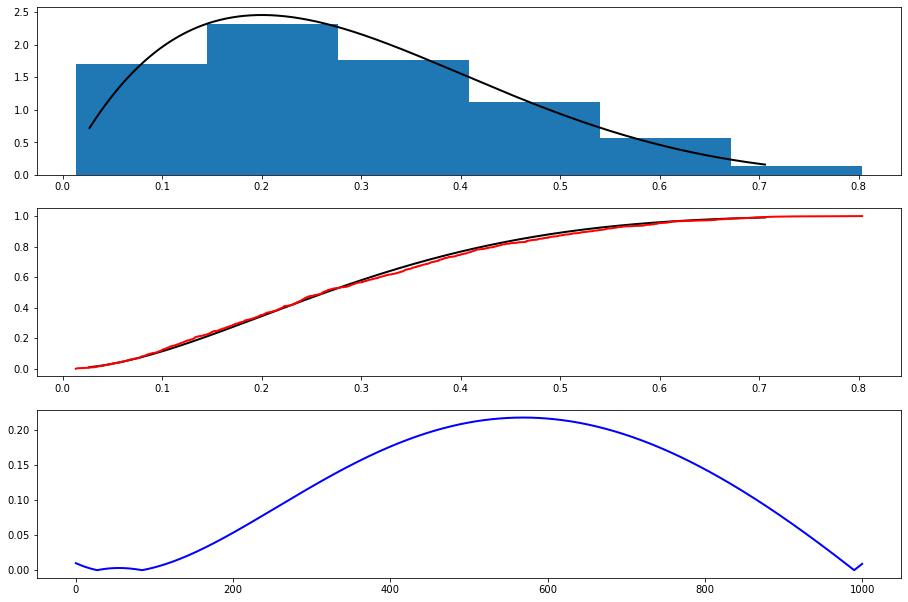

In [1]:
from scipy.stats import beta, norm 
import matplotlib.pyplot as plt 
import numpy as np 
fig, ax = plt.subplots(3, 1) 
fig.set_size_inches(15.5, 10.5) 
 
 
#plot pdf of beta(2,5) 
x = np.linspace(beta.ppf(0.01, 2, 5),beta.ppf(0.99, 2, 5), 1000) 
rv = beta(2, 5) 
ax[0].plot(x, rv.pdf(x), 'k-', lw=2) 
 
#find the norm distibution that sastisfying the method visually (m = 6.45) (delete the "#" below to see the plot) 
#x1 = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 40) 
#rv1 = norm() 
#ax.plot(x1, 6.45*rv1.pdf(x1), 'red', lw=2) 
 
#Accept-reject method 
 
X1 = np.array([]) 
for i in range(1000): 
    while True: 
        y = np.random.normal(0,1,1) 
        u = np.random.uniform(0,1,1) 
     
        f = beta.pdf(y,2,5) 
        g = norm.pdf(y) 
        if u <= f/(6.45*g): 
            X1 = np.append(X1,y) 
            break 
             
ax[0].hist(X1,bins=6, density = True) 
 
#Difference in CDFs 
 
ax[1].plot(x, rv.cdf(x), 'k-', lw=2) 
 
X1 = np.sort(X1) 
Y1 = np.arange(len(X1))/float(len(X1)) 
ax[1].plot(X1,Y1 , 'red', lw=2) 
 
diff = np.absolute(rv.cdf(x)-Y1) 
ax[2].plot(np.linspace(0,1000, num=1000),diff,'blue',lw=2) 
